In [1]:
# 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,149 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128215 files and di

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/연구실용/"
path2 = "/content/drive/My Drive/연구실/"

In [ ]:
# 여기서부터 안 돌려도 됨

In [ ]:
data = pd.read_csv(path2+"전처리최종이었음좋겠다.csv")

In [ ]:
X = data.drop(['한국표준산업분류코드10차(중분류)', '수익률 (1개월)(%)', 'macro_뉴스심리지수',
               'yearmonth', 'Ticker'], axis=1)
y = data['수익률 (1개월)(%)']
ym = data['yearmonth']
tk = data['Ticker']

In [ ]:
X.columns

Index(['베타 (D,1Yr)', 'PER(배)', 'PSR(배)', 'chmom', 'mom36m', 'zerotrade',
       'std_turn', 'mean_ill', 'retvol', 'maxret', 'var_market', 'mom1m',
       'mom12m', 'indmom', 'turn', 'mvel1', 'dolvol', 'betasq', 'Idiovol',
       'macro_(콜금리-기준금리)평균', 'macro_원/달러환율', 'macro_금($/OZ)', 'macro_KOSPI dp',
       'macro_KOSPI PER', 'macro_KOSPI PBR', 'macro_CD Rate',
       'macro_Term spread', 'macro_Default Spread', 'macro_VKOSPI 200'],
      dtype='object')

In [ ]:
X.shape

(312185, 29)

In [ ]:
X.iloc[:, :19].columns

Index(['베타 (D,1Yr)', 'PER(배)', 'PSR(배)', 'chmom', 'mom36m', 'zerotrade',
       'std_turn', 'mean_ill', 'retvol', 'maxret', 'var_market', 'mom1m',
       'mom12m', 'indmom', 'turn', 'mvel1', 'dolvol', 'betasq', 'Idiovol'],
      dtype='object')

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 7.2 MB/s eta 0:00:00


# R2oos

In [ ]:
# GBRT
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_gbrt = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"GBRT_bayesian_r2oos_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, 19:]
    shap_gbrt.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# RF
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_rf = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"RF_bayesian_r2oos_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, 19:]
    shap_rf.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# PLS
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pls = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PLS_r2oos_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pls.append(np.apply_along_axis(my_func, 1, abs(shap_values[0])[:, 19:]))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# PCR
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pcr = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PCR_r2oos_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, 19:]
    shap_pcr.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
temp = pd.DataFrame({'PCR' : np.mean(np.mean(shap_pcr, axis=0), axis=0).tolist(),
                     'PLS' : np.mean(np.mean(shap_pls, axis=0), axis=0).tolist(),
                     'GBRT' : np.mean(np.mean(shap_gbrt, axis=0), axis=0).tolist(),
                     'RF' : np.mean(np.mean(shap_rf, axis=0), axis=0).tolist()}, index = X_train.columns[19:], dtype = float)
temp.head()

,PCR,PLS,GBRT,RF
macro_(콜금리-기준금리)평균,0.059083,0.013064,0.196488,0.061123
macro_원/달러환율,0.118068,0.088377,0.038971,0.053097
macro_금($/OZ),0.100025,0.128375,0.043541,0.114955
macro_KOSPI dp,0.136094,0.189493,0.037401,0.122487
macro_KOSPI PER,0.123141,0.154364,0.280756,0.272898


In [ ]:
np.sum(temp, axis=0)

PCR     1.0
PLS     1.0
GBRT    1.0
RF      1.0
dtype: float64

In [ ]:
temp.to_csv(path2+"macro_heatmap_r2oos.csv")

In [ ]:
temp["ENet"] = pd.read_csv(path2+"GLM_r2oos_sharpley.csv").transpose().values[19:]/np.sum(pd.read_csv(path2+"GLM_r2oos_sharpley.csv").transpose().values[19:])
temp["LGBM"]= pd.read_csv(path2+"LGBM_r2oos_sharpley.csv").transpose().values[19:]/np.sum(pd.read_csv(path2+"LGBM_r2oos_sharpley.csv").transpose().values[19:])
temp.head()

,PCR,PLS,GBRT,RF,ENet,LGBM
macro_(콜금리-기준금리)평균,0.059083,0.013064,0.196488,0.061123,1.528172e-02,0.142800
macro_원/달러환율,0.118068,0.088377,0.038971,0.053097,2.615430e-15,0.045271
macro_금($/OZ),0.100025,0.128375,0.043541,0.114955,2.254646e-02,0.089726
macro_KOSPI dp,0.136094,0.189493,0.037401,0.122487,5.621838e-01,0.083136
macro_KOSPI PER,0.123141,0.154364,0.280756,0.272898,1.742699e-01,0.197256


In [ ]:
temp = temp.iloc[:, [4, 0, 1, 2, 3, 5]]
temp.head()

,ENet,PCR,PLS,GBRT,RF,LGBM
macro_(콜금리-기준금리)평균,1.528172e-02,0.059083,0.013064,0.196488,0.061123,0.142800
macro_원/달러환율,2.615430e-15,0.118068,0.088377,0.038971,0.053097,0.045271
macro_금($/OZ),2.254646e-02,0.100025,0.128375,0.043541,0.114955,0.089726
macro_KOSPI dp,5.621838e-01,0.136094,0.189493,0.037401,0.122487,0.083136
macro_KOSPI PER,1.742699e-01,0.123141,0.154364,0.280756,0.272898,0.197256


In [ ]:
temp.to_csv(path2+"macro_heatmap_r2oos.csv")

# CRP10

In [ ]:
# GBRT
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_gbrt = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"GBRT_bayesian_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, 19:]
    shap_gbrt.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# RF
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_rf = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"RF_bayesian_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, 19:]
    shap_rf.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# PLS
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pls = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PLS_irr"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pls.append(np.apply_along_axis(my_func, 1, abs(shap_values[0])[:, 19:]))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# PCR
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pcr = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PCR_irr_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, 19:]
    shap_pcr.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
temp = pd.DataFrame({'PCR' : np.mean(np.mean(shap_pcr, axis=0), axis=0).tolist(),
                     'PLS' : np.mean(np.mean(shap_pls, axis=0), axis=0).tolist(),
                     'GBRT' : np.mean(np.mean(shap_gbrt, axis=0), axis=0).tolist(),
                     'RF' : np.mean(np.mean(shap_rf, axis=0), axis=0).tolist()}, index = X_train.columns[19:], dtype = float)
temp.head()

,PCR,PLS,GBRT,RF
macro_(콜금리-기준금리)평균,0.075882,0.066565,0.161759,0.124000
macro_원/달러환율,0.056859,0.032621,0.048506,0.055767
macro_금($/OZ),0.100946,0.100306,0.089917,0.157935
macro_KOSPI dp,0.163561,0.093016,0.043994,0.096823
macro_KOSPI PER,0.113347,0.098167,0.195051,0.192526


In [ ]:
np.sum(temp, axis=0)

PCR     1.0
PLS     1.0
GBRT    1.0
RF      1.0
dtype: float64

In [ ]:
temp.to_csv(path2+"macro_heatmap_CRP10.csv")

In [ ]:
temp["ENet"] = pd.read_csv(path2+"GLM_irr_sharpley.csv").transpose().values[19:]/np.sum(pd.read_csv(path2+"GLM_irr_sharpley.csv").transpose().values[19:])
temp["LGBM"]= pd.read_csv(path2+"LGBM_irr_sharpley.csv").transpose().values[19:]/np.sum(pd.read_csv(path2+"LGBM_irr_sharpley.csv").transpose().values[19:])
temp.head()

,PCR,PLS,GBRT,RF,ENet,LGBM
macro_(콜금리-기준금리)평균,0.075882,0.066565,0.161759,0.124000,0.057525,0.154563
macro_원/달러환율,0.056859,0.032621,0.048506,0.055767,0.018296,0.048422
macro_금($/OZ),0.100946,0.100306,0.089917,0.157935,0.102484,0.095378
macro_KOSPI dp,0.163561,0.093016,0.043994,0.096823,0.087091,0.076767
macro_KOSPI PER,0.113347,0.098167,0.195051,0.192526,0.108222,0.179969


In [ ]:
temp = temp.iloc[:, [4, 0, 1, 2, 3, 5]]
temp.head()

,ENet,PCR,PLS,GBRT,RF,LGBM
macro_(콜금리-기준금리)평균,0.057525,0.075882,0.066565,0.161759,0.124000,0.154563
macro_원/달러환율,0.018296,0.056859,0.032621,0.048506,0.055767,0.048422
macro_금($/OZ),0.102484,0.100946,0.100306,0.089917,0.157935,0.095378
macro_KOSPI dp,0.087091,0.163561,0.093016,0.043994,0.096823,0.076767
macro_KOSPI PER,0.108222,0.113347,0.098167,0.195051,0.192526,0.179969


In [ ]:
temp.to_csv(path2+"macro_heatmap_CRP10.csv")

In [5]:
r2oos = pd.read_csv(path2+"macro_heatmap_r2oos.csv", index_col=0)
CRP10 = pd.read_csv(path2+"macro_heatmap_CRP10.csv", index_col=0)

In [ ]:
r2oos.head()

,ENet,PCR,PLS,GBRT,RF,LGBM,NN1,NN2,NN3,NN4,NN5
mean(call rate - base rate),1.528172e-02,0.059083,0.013064,0.196488,0.061123,0.142800,0.036702,0.016088,0.012405,0.007574,0.007242
exchange rate (won/dollar),2.615430e-15,0.118068,0.088377,0.038971,0.053097,0.045271,0.065965,0.161040,0.265303,0.247163,0.274618
gold ($),2.254646e-02,0.100025,0.128375,0.043541,0.114955,0.089726,0.193977,0.233632,0.284098,0.329814,0.337164
KOSPI dp,5.621838e-01,0.136094,0.189493,0.037401,0.122487,0.083136,0.058896,0.028053,0.038970,0.036355,0.019213
KOSPI PER,1.742699e-01,0.123141,0.154364,0.280756,0.272898,0.197256,0.093729,0.079871,0.066201,0.055927,0.058102


In [ ]:
r2oos.index

Index(['mean(call rate - base rate)', 'exchange rate (won/dollar)', 'gold ($)',
       'KOSPI dp', 'KOSPI PER', 'KOSPI PBR', 'CD rate', 'term spread',
       'default spread', 'VKOSPI 200'],
      dtype='object')

In [8]:
r2oos.rename({'mean(call rate - base rate)' : 'mean(call-base)',
              'exchange rate (won/dollar)' : 'exchange rate'}, axis=0, inplace=True)

CRP10.rename({'mean(call rate - base rate)' : 'mean(call-base)',
              'exchange rate (won/dollar)' : 'exchange rate'}, axis=0, inplace=True)

In [ ]:
r2oos.rename({'macro_(콜금리-기준금리)평균' : 'mean(call rate - base rate)',
              'exchange rate' : 'exchange rate (won/dollar)',
              'macro_금($/OZ)' : 'gold ($)',
              'macro_KOSPI dp' : 'KOSPI dp',
              'macro_KOSPI PER' : 'KOSPI PER',
              'macro_KOSPI PBR' : 'KOSPI PBR',
              'macro_CD Rate' : 'CD rate',
              'macro_Term spread' : 'term spread',
              'macro_Default Spread' : 'default spread',
              'macro_VKOSPI 200' : 'VKOSPI 200'}, axis=0, inplace=True)

CRP10.rename({'macro_(콜금리-기준금리)평균' : 'mean(call rate - base rate)',
              'exchange rate' : 'exchange rate (won/dollar)',
              'macro_금($/OZ)' : 'gold ($)',
              'macro_KOSPI dp' : 'KOSPI dp',
              'macro_KOSPI PER' : 'KOSPI PER',
              'macro_KOSPI PBR' : 'KOSPI PBR',
              'macro_CD Rate' : 'CD rate',
              'macro_Term spread' : 'term spread',
              'macro_Default Spread' : 'default spread',
              'macro_VKOSPI 200' : 'VKOSPI 200'}, axis=0, inplace=True)

In [ ]:
r2oos["NN1"] = pd.read_csv(path2+"NNs_R2_macro.csv")["NN1"].values/np.sum(pd.read_csv(path2+"NNs_R2_macro.csv")["NN1"].values)
r2oos["NN2"] = pd.read_csv(path2+"NNs_R2_macro.csv")["NN2"].values/np.sum(pd.read_csv(path2+"NNs_R2_macro.csv")["NN2"].values)
r2oos["NN3"] = pd.read_csv(path2+"NNs_R2_macro.csv")["NN3"].values/np.sum(pd.read_csv(path2+"NNs_R2_macro.csv")["NN3"].values)
r2oos["NN4"] = pd.read_csv(path2+"NNs_R2_macro.csv")["NN4"].values/np.sum(pd.read_csv(path2+"NNs_R2_macro.csv")["NN4"].values)
r2oos["NN5"] = pd.read_csv(path2+"NNs_R2_macro.csv")["NN5"].values/np.sum(pd.read_csv(path2+"NNs_R2_macro.csv")["NN5"].values)

CRP10["NN1"] = pd.read_csv(path2+"NNs_IRR_macro.csv")["NN1"].values/np.sum(pd.read_csv(path2+"NNs_IRR_macro.csv")["NN1"].values)
CRP10["NN2"] = pd.read_csv(path2+"NNs_IRR_macro.csv")["NN2"].values/np.sum(pd.read_csv(path2+"NNs_IRR_macro.csv")["NN2"].values)
CRP10["NN3"] = pd.read_csv(path2+"NNs_IRR_macro.csv")["NN3"].values/np.sum(pd.read_csv(path2+"NNs_IRR_macro.csv")["NN3"].values)
CRP10["NN4"] = pd.read_csv(path2+"NNs_IRR_macro.csv")["NN4"].values/np.sum(pd.read_csv(path2+"NNs_IRR_macro.csv")["NN4"].values)
CRP10["NN5"] = pd.read_csv(path2+"NNs_IRR_macro.csv")["NN5"].values/np.sum(pd.read_csv(path2+"NNs_IRR_macro.csv")["NN5"].values)

In [6]:
rrank = pd.DataFrame(pd.read_csv(path2+"LGBMranker_irr_importance.csv", index_col=0).values[19:], index = r2oos.index)
rrank = rrank/np.sum(rrank)
rrank.rename({0 : 'LGBMRank'}, axis=1, inplace=True)
rrank

,LGBMRank
mean(call rate - base rate),0.112921
exchange rate (won/dollar),0.078775
gold ($),0.098963
KOSPI dp,0.093633
KOSPI PER,0.118596
KOSPI PBR,0.103509
CD rate,0.135255
term spread,0.064766
default spread,0.098398
VKOSPI 200,0.095184


In [7]:
rrank.rename({'mean(call rate - base rate)' : 'mean(call-base)',
              'exchange rate (won/dollar)' : 'exchange rate'}, axis=0, inplace=True)

In [ ]:
r2oos.to_csv(path2+"macro_heatmap_r2oos.csv")
CRP10.to_csv(path2+"macro_heatmap_CRP10.csv")

In [9]:
ools = pd.DataFrame(pd.read_csv(path2+"ols_macro.csv").values, index = r2oos.index)
ools = ools/np.sum(ools)
ools.rename({0 : 'OLS'}, axis=1, inplace=True)
ools

,OLS
mean(call-base),0.000534
exchange rate,0.103280
gold ($),0.260280
KOSPI dp,0.013685
KOSPI PER,0.181515
KOSPI PBR,0.005051
CD rate,0.119762
term spread,0.033975
default spread,0.192385
VKOSPI 200,0.089533


In [10]:
ools.rename({'mean(call rate - base rate)' : 'mean(call-base)',
              'exchange rate (won/dollar)' : 'exchange rate'}, axis=0, inplace=True)

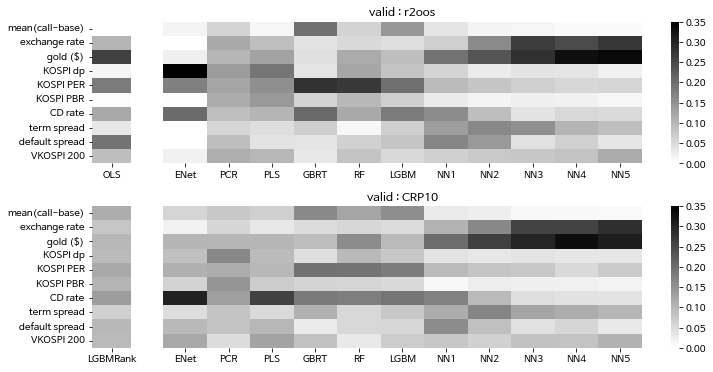

In [11]:
import seaborn as sns
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows = 2, # row 몇 개 
                       ncols = 2, # col 몇 개
                       height_ratios = [10, 10], 
                       width_ratios = [1, 15]
                      )

fig.subplots_adjust(wspace = 0.1, hspace = 0.3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

sns.heatmap(ools, cmap="binary", vmin=0, vmax=0.35, cbar=False, ax=ax0)
# ax0.set_title("OLS")

sns.heatmap(r2oos, cmap="binary", vmin=0, vmax=0.35, ax=ax1)
ax1.set_title("valid : r2oos")
ax1.set_yticks([])

sns.heatmap(rrank, cmap="binary", vmin=0, vmax=0.35, cbar=False, ax=ax2)
# ax2.set_title("LGBMRank")

sns.heatmap(CRP10, cmap="binary", vmin=0, vmax=0.35, ax=ax3)
ax3.set_title("valid : CRP10")
ax3.set_yticks([])

# fig.suptitle("Stock-level variance importance plot", fontsize=15)
# plt.tight_layout()
plt.show()
fig.savefig(path+'image 모음/VIP_macro.png', bbox_inches='tight', pad_inches=0.1)

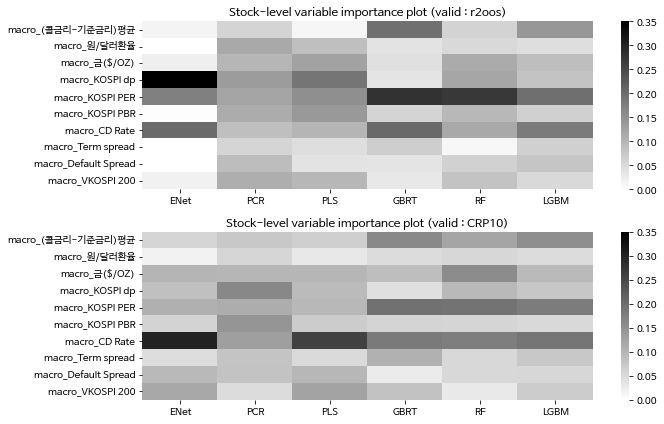

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(10, 6))

# plt.subplot(2, 1, 1)
# sns.heatmap(r2oos, cmap="binary", vmin=0, vmax=0.35)
# plt.title("Stock-level variable importance plot (valid : r2oos)")
# plt.rc('figure', titlesize = 70) # figure title 폰트 크기

# plt.subplot(2, 1, 2)
# sns.heatmap(CRP10, cmap="binary", vmin=0, vmax=0.35)
# plt.title("Stock-level variable importance plot (valid : CRP10)")
# plt.rc('figure', titlesize = 70) # figure title 폰트 크기

# plt.tight_layout()
# plt.show()